# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять,
какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.
В вашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются,
сколько звонков и сообщений каждый отправил за 2018 год.
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
 #### Тариф «Смарт»
 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей  
    
#### Тариф «Ультра»  
 1. Ежемесячная плата: 1950 рублей
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей  
    
Обратите внимание: оператор всегда округляет вверх значения минут и мегабайтов.
Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### План работ:

#### Шаг 1. Откроем файлы с данными и изучим общую информацию  
#### Шаг 2. Подготовим данные:
 - Приведём данные к нужным типам;
 - Найдём и исправим ошибки в данных. 
 
##### Посчитаем для каждого пользователя:  
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).  
 
#### Шаг 3. Проанализируем данные:
 Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.  
 
#### Шаг 4. Проверим гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; 
 
##### Поясним:
 - как формулировали нулевую и альтернативную гипотезы;
 - какой критерий использовали для проверки гипотез и почему.

#### Шаг 5. Напишем общий вывод

## Шаг 1. Откроем файлы с данными и изучим общую информацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
users = pd.read_csv('/datasets/users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


##### Таблица users (информация о пользователях):  
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [4]:
#Посмотрим на таблицу юзеров
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Пропуски только в churn_date дата прекращения пользования тарифом, как и говорится в задаче это значит, что на момент выгрузки данных, 462 пользователя все ещё пользуются тарифом. Этот столбец в формате object хотя там и есть даты, из-за пропусков привести его к типу дат не получится. Пока никак данные удалять не будем, оставим так и посмотрим как себя покажет в дальнейшем анализе.

Обратим внимание, что столбец reg_date в формате object, на втором шаге при подготовке данных приведем его к типу даты.

In [5]:
#Поверим на дубликаты
users.duplicated().sum()

0

In [6]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


##### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [7]:
#Посмотрим на таблицу звонков
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Обратим внимание, что столбец call_date в формате object, на втором шаге при подготовке данных приведем его к типу даты.

Продолжительность некоторых звонков duration равна нулю, это возможно звонки, когда человек звонил и ему не ответили. Посмотрим сколько таких звонков. Запомним это, и что с ними делать будем решать на шаге 2 при подготовке данных.

In [8]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


##### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [9]:
#Посмотрим на таблицу сообщений
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Столбец message_date нужно перевести в тип даты из object

In [10]:
# Добавил при чтении файла index_col=0 иначе появляется столбец с индексами и названием Unnamed: 0
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


##### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [11]:
#Посмотрим на таблицу интернет трафика
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Столбец session_date нужно перевести в тип даты из object.

In [12]:
#Проверим у скольки пользователей трафик интернета равен нулю
internet_mb_used_equal_zero = internet[internet['mb_used'] == 0]['mb_used'].count()
internet_mb_used_equal_zero

19598

Вряд ли это можно считать выбросом, кто-то действительно мог не пользоваться интернетом.

In [13]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


##### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [14]:
#Посмотрим на таблицу с тарифами
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод  

Данные выглядят чисто, почти без пропускав, там где они есть (churn_date дата прекращения пользования тарифом) это оправдано. Только продолжительность некоторых звонков duration равная нуля пока смущает, но что с ней делать решим далее в ходе анализа.  

Нужно изменить тип на дату в столбцах reg_date дата регистрации в таблице users, call_date в таблице calls, message_date в таблице messages, и session_date в таблице internet.

## Шаг 2. Подготовим данные  

### Приведем данные к нужным типам

In [15]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

### Найдём и исправим ошибки в данных необходимых для анализа.


##### Таблица users

In [16]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [17]:
#Проверка возраста пользователей
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Возраст от 18 до 75, с данными все нормально.

In [18]:
#Проверка даты регистрации пользователей чтобы не было например 1970 года или ненаступившего
users['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

Даты регистрации адекватные.

In [19]:
#Проверка города
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

76 уникальных городов, данные чистые.

In [20]:
#посмотрим сколько юзеров какое количество тарифом используют
users.pivot_table(index=['tariff'],values='user_id',aggfunc='count')

,user_id
tariff,
smart,351
ultra,149


##### Таблица calls

In [21]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [22]:
#проверим нет ли лишних user_id в таблице calls которые бы не совпадали с user_id в users
calls[~calls['user_id'].isin(users['user_id'])]['user_id'].count()

0

Лишних нет.

In [23]:
#проверим сколько юзеров совершают звонки
calls['user_id'].value_counts().count()

492

In [24]:
#проверим кто не звонит
not_use_calls = users[~users['user_id'].isin(calls['user_id'])]
not_use_calls

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
106,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
231,1231,63,NaN,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
328,1328,44,NaN,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [25]:
calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

Даты впорядке.

In [26]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [27]:
#Посмотрим сколько звонков продолжительностью 0 минут

calls_duration_equal_zero = calls[calls['duration'] == 0]['duration'].count()
calls_duration_equal_zero

39613

In [28]:
#Посмотрим на процент звонков равных нулю от общего кол-ва звонков
calls_duration_equal_zero/calls['duration'].count()

0.19551644316336553

Мы не используем нигде количество звонков для анализа, а только продолжительность, поэтому нули можно оставить.

Добавим столбец с названием месяца для удобства дальнейших вычислений.

In [29]:
calls['month'] = calls['call_date'].dt.month
calls['month']

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 202607, dtype: int64

##### Таблица messages

In [30]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [31]:
messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Даты нормальные без выбросов.

In [32]:
#проверим нет ли лишних user_id в таблице messages которые бы не совпадали с user_id в users
messages[~messages['user_id'].isin(users['user_id'])]['user_id'].count()

0

Таких несовпадающих id нет.

In [33]:
#проверим сколько юзеров пишут смс
messages['user_id'].value_counts().count()

426

In [34]:
#проверим кто не пользуется
not_use_messages = users[~users['user_id'].isin(messages['user_id'])]
not_use_messages

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
10,1010,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart
17,1017,73,NaN,Краснодар,Мария,Аленникова,2018-05-22,smart
24,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
...,...,...,...,...,...,...,...,...
462,1462,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart
466,1466,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
469,1469,41,NaN,Сочи,Аксён,Абалкин,2018-07-06,ultra
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart


Добавим столбец с названием месяца для удобства дальнейших вычислений.

In [35]:
messages['month'] = messages['message_date'].dt.month
messages['month']

0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: month, Length: 123036, dtype: int64

##### Таблица internet

In [36]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [37]:
internet['session_date'].describe()

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

Даты впорядке.

In [38]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Трафик тоже впорядке.

In [39]:
#проверим нет ли лишних user_id в таблице internet которые бы не совпадали с user_id в users
internet[~internet['user_id'].isin(users['user_id'])]['user_id'].count()

0

In [40]:
#проверим сколько юзеров пользуются интернетом
internet['user_id'].value_counts().count()

497

In [41]:
#проверим кто не пользуется
not_use_internet = users[~users['user_id'].isin(internet['user_id'])]
not_use_internet

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Добавим столбец с названием месяца для удобства дальнейших вычислений.

In [42]:
internet['month'] = internet['session_date'].dt.month
internet['month']

0         11
1          9
2          6
3          8
4          9
          ..
149391    10
149392    12
149393    10
149394    11
149395    10
Name: month, Length: 149396, dtype: int64

In [43]:
#проверим кто вообще ничем не пользуется
not_use_calls_and_internet = not_use_calls[not_use_calls['user_id'].isin(not_use_internet['user_id'])]
not_use_calls_and_internet[not_use_calls_and_internet['user_id'].isin(not_use_messages['user_id'])]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Людей подключили в конце года, возможно они просто не успели воспользоваться услугами. Пока удалять не будут, так как будем считать кто сколько проговорил минут и вообще потратил на каждый из тарифов. Возможно эти пользователи не помешают.

### Посчитаем для каждого пользователя:  

##### Количество сделанных звонков и израсходованных минут разговора по месяцам:

In [44]:
#Количество сделаных звонков
calls_count = calls.pivot_table(index=['user_id', 'month'],values='id',aggfunc='count')
calls_count

id
user_id month    
1000    5      22
        6      43
        7      47
        8      52
        9      58
...            ..
1498    10     41
1499    9       9
        10     68
        11     74
        12     69

[3174 rows x 1 columns]

С пропусками делать пока ничего не будем иначе вся ситуация по месяцам не будет так хорошо видна и структура сломается.

In [45]:
#Продолжительность сделаных звонков по месяцам
duration_calls_count = calls.pivot_table(index=['user_id', 'month'],values='duration',aggfunc='sum')
#По условию Мегаплан все округляет в большую сторону, минуты и мегабайты до целых
duration_calls_count['duration'] = np.ceil(duration_calls_count['duration']).astype(int)
duration_calls_count

duration
user_id month          
1000    5           151
        6           159
        7           319
        8           390
        9           441
...                 ...
1498    10          233
1499    9            65
        10          430
        11          577
        12          466

[3174 rows x 1 columns]

##### Количество отправленных сообщений по месяцам:

In [46]:
messages_count = messages.pivot_table(index=['user_id', 'month'],values='id',aggfunc='count')
messages_count

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [47]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


##### Объем израсходованного интернет-трафика по месяцам:

In [48]:
internet_count = internet.pivot_table(index=['user_id', 'month'],values='mb_used',aggfunc='sum')
#По условию Мегаплан все округляет в большую сторону, минуты и мегабайты до целых
internet_count['mb_used'] = np.ceil(internet_count['mb_used']).astype(int)
internet_count

mb_used
user_id month         
1000    5         2254
        6        23234
        7        14004
        8        14056
        9        14569
...                ...
1498    10       20580
1499    9         1846
        10       17789
        11       17964
        12       13056

[3203 rows x 1 columns]

##### Помесячную выручку с каждого пользователя:

In [49]:
#Сведём все в одну таблицу
all_data = calls_count.merge(duration_calls_count,on=['user_id','month'])
all_data = all_data.merge(messages_count,on=['user_id','month'])
all_data = all_data.merge(internet_count,on=['user_id','month'])

In [50]:
#Переименуем столбцы
all_data.rename(columns={
    'id_x': 'calls_count', 
    'duration': 'calls_duration', 
    'id_y': 'messegase_count',
    'mb_used': 'megabyte_used'}, inplace=True)

In [51]:
#Добавим город и тариф и сделаем таблицу плоской
all_data.reset_index(level='month', inplace=True)
all_data = all_data.merge(users[['user_id','city','tariff']], on='user_id',how='left')

In [52]:
# Посчитаем расходы по месяцам и запишем в ту же таблицу
def set_revenu(row):
    # данные тарифа
    tariff = tariffs[tariffs['tariff_name'] == row['tariff']]

    # расходы по категориям по модулю чтобы не было отрицательных, если есть значит не вышли из тарифа и траты 0 руб
    expenses_calls = (np.clip((row['calls_duration'] -
                          tariff['minutes_included'].values[0]),0,100000) 
                      * tariff['rub_per_minute'].values[0])

    expenses_message = (np.clip((row['messegase_count']
                            - tariff['messages_included'].values[0]),0,100000) 
                        * tariff['rub_per_message'].values[0])

    # тариф округляется вверх за каждый гигабайт
    expenses_internet = (np.ceil((np.clip((row['megabyte_used']
                                      - tariff['mb_per_month_included'].values[0]),0,100000) / 1024)) 
                         * tariff['rub_per_gb'].values[0])

    row['revenu'] = (expenses_calls + 
                     expenses_message + 
                     expenses_internet + 
                     tariff['rub_monthly_fee'].values[0])

    return row

all_data = all_data.apply(set_revenu,axis=1)
all_data['revenu'] = all_data['revenu'].astype(int)
all_data

,user_id,month,calls_count,calls_duration,messegase_count,megabyte_used,city,tariff,revenu
0,1000,5,22,151,22,2254,Краснодар,ultra,1950
1,1000,6,43,159,60,23234,Краснодар,ultra,1950
2,1000,7,47,319,75,14004,Краснодар,ultra,1950
3,1000,8,52,390,81,14056,Краснодар,ultra,1950
4,1000,9,58,441,57,14569,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...
2662,1498,10,41,233,42,20580,Владикавказ,smart,1750
2663,1499,9,9,65,11,1846,Пермь,smart,550
2664,1499,10,68,430,48,17789,Пермь,smart,1150
2665,1499,11,74,577,59,17964,Пермь,smart,1408


In [53]:
all_data['revenu'].describe()

count    2667.000000
mean     1480.978253
std       789.486610
min       550.000000
25%       698.500000
50%      1550.000000
75%      1950.000000
max      6614.000000
Name: revenu, dtype: float64

## Шаг 3. Проанализируем данные

Опишим поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения.

Будем смотреть не на дисперсию, а на статистику ( s², а не σ²) так как дисперсия берется из генеральной совокупности, а у нас случайная небольшая выборка.

In [54]:
#Разделим выборки по тарифам
smart = all_data[all_data['tariff'] == 'smart']
ultra = all_data[all_data['tariff'] == 'ultra']

### Проведем анализ звонков для двух тарифов  по месяцам

In [55]:
col = 'calls_duration'
smart_month = smart.groupby('month')[col]
smart_month.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,31.0,200.000000,147.438575,0.0,82.50,164.0,315.00,528.0
2,50.0,295.720000,185.275971,2.0,133.75,276.5,438.00,711.0
3,69.0,371.231884,184.659237,12.0,221.00,388.0,498.00,783.0
4,96.0,360.468750,173.355913,0.0,246.00,367.0,476.25,744.0
5,122.0,377.377049,174.756800,12.0,247.75,414.5,496.50,784.0
6,141.0,377.092199,160.844375,7.0,262.00,379.0,492.00,711.0
7,174.0,386.919540,168.055607,2.0,265.25,389.0,510.00,736.0
8,202.0,405.905941,174.295186,7.0,284.00,416.0,516.50,946.0
9,222.0,405.644144,170.168068,22.0,280.00,416.0,518.75,797.0


In [56]:
ultra_month = ultra.groupby('month')[col]
ultra_month.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,7.0,450.714286,251.437676,254.0,262.00,360.0,600.00,817.0
2,14.0,378.642857,314.109145,5.0,90.75,334.0,669.00,872.0
3,25.0,522.880000,349.683109,95.0,259.00,438.0,789.00,1529.0
4,38.0,471.894737,255.995649,48.0,289.75,456.5,651.75,1037.0
5,48.0,503.000000,271.084190,15.0,330.25,491.5,650.25,1159.0
6,63.0,470.492063,294.611547,1.0,221.00,457.0,689.00,1338.0
7,69.0,527.739130,285.005039,0.0,329.00,538.0,717.00,1238.0
8,83.0,498.469880,293.800054,0.0,307.50,495.0,684.50,1249.0
9,90.0,533.611111,296.000368,0.0,326.75,497.0,761.00,1224.0


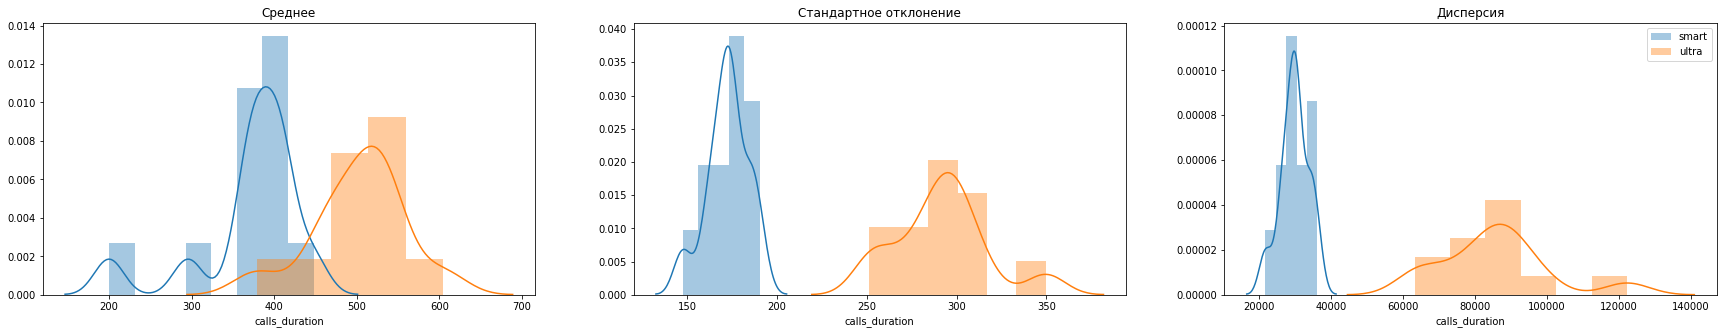

In [57]:
#Построим графики двух тарифов
def compate_two_dist_month():
    fig, axs = plt.subplots(figsize=(30,5),ncols=3)
    sns.distplot(smart_month.mean(),ax=axs[0],label='smart').set_title('Среднее');
    sns.distplot(ultra_month.mean(), ax=axs[0],label='ultra');
    sns.distplot(smart_month.std()**2,ax=axs[2],label='smart').set_title('Дисперсия');
    sns.distplot(ultra_month.std()**2, ax=axs[2],label='ultra');
    sns.distplot(smart_month.std(),ax=axs[1],label='smart').set_title('Стандартное отклонение');
    sns.distplot(ultra_month.std(), ax=axs[1],label='ultra');
    plt.legend()
compate_two_dist_month()

### Теперь посмотрим на каждый по отдельности в общем и сделаем выводы
##### Smart

In [58]:
smart[col].describe()

count    1915.000000
mean      397.861097
std       177.566493
min         0.000000
25%       270.000000
50%       404.000000
75%       517.000000
max      1355.000000
Name: calls_duration, dtype: float64

Медиана больше среднего, значит данные скошены влево.

In [59]:
#Найдем среднее
smart_mean = smart[col].mean()
smart_mean

397.86109660574414

In [60]:
#Найдем "дисперсию"
smart_variance = np.var(smart[col], ddof=1)
smart_variance

31529.859483645312

In [61]:
#Найдем стандартное отклонение
smart_sigma = np.std(smart[col], ddof=1)
smart_sigma

177.5664931332635

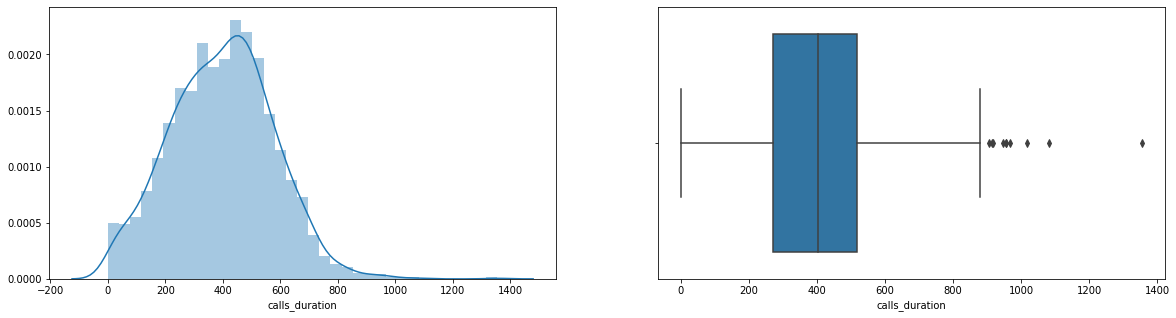

In [62]:
#Построим графики
def dist_and_box(df,col):
    fig, axs = plt.subplots(ncols=2,figsize=(20,5))
    sns.distplot(df[col],ax=axs[0]);
    sns.boxplot(df[col], ax=axs[1]);
dist_and_box(smart,col)

In [63]:
smart_mean + 3 * smart_sigma

930.5605760055346

In [64]:
smart_mean - 3 * smart_sigma

-134.8383827940463

In [65]:
#Проверим диапазон, скольк доля не покрытых значений 
smart[smart[col]> 930][col].count()/smart[col].count()

0.0036553524804177544

In [66]:
smart_mean + 1 * smart_sigma

575.4275897390077

In [67]:
smart_mean - 1 * smart_sigma

220.29460347248065

Наш диапазон покрывает более 99% выборки, значит расчеты произведены верно. Минимальное значение у нас 0, но левая граница распределения уходит в минус. Может быть связано с тем, что среднее смещено влево, и график имеет скос влево, медиана 404 почти совпадает со средним 397.86, но она немного больше. Коротких звонков меньше, чем продолжительных. Большая часть людей разговаривает от 220 до 575 мин в месяц.

##### Ultra

In [68]:
ultra[col].describe()

count     752.000000
mean      526.159574
std       294.442105
min         0.000000
25%       315.000000
50%       506.500000
75%       718.000000
max      1579.000000
Name: calls_duration, dtype: float64

Медиана меньше среднего, значит данные скошены вправо.

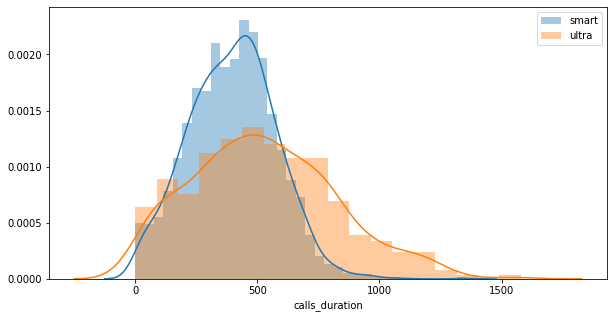

In [69]:
#Построим графики двух тарифов
def compate_two_dist(col):
    fig, axs = plt.subplots(figsize=(10,5))
    sns.distplot(smart[col],ax=axs,label='smart');
    sns.distplot(ultra[col], ax=axs,label='ultra');
    plt.legend()
compate_two_dist(col)

По графикам видно что количество продолжительных звонков по тарифу ultra больше (оранжевая гистограмма).

In [70]:
#Найдем среднее
ultra_mean = ultra[col].mean()
ultra_mean

526.1595744680851

In [71]:
#Найдем "дисперсию"
ultra_variance = np.var(ultra[col], ddof=1)
ultra_variance

86696.15293084398

In [72]:
#Найдем стандартное отклонение
ultra_sigma = np.std(ultra[col], ddof=1)
ultra_sigma

294.4421045483203

Средняя продолжительность 526 выше чем у тарифа smart 397 и стандартное
отклонение 294 против 177, это тоже указывает на то что
продолжительность звонков дольше, возможно этот тариф
 пользуется популярнусть у бизнесменов, менеджеров по продажам,
  риэлтеров которые часто созваниваются с клиентами.

In [73]:
ultra_mean + 3 * ultra_sigma

1409.485888113046

In [74]:
ultra_mean - 3 * ultra_sigma

-357.1667391768758

In [75]:
#разделим крайнюю границу распределения по ultra на такую же по smart
1409/930

1.5150537634408603

По этому тарифу говорят на 50% дольше. Выбрасов по продолжительности меньше.

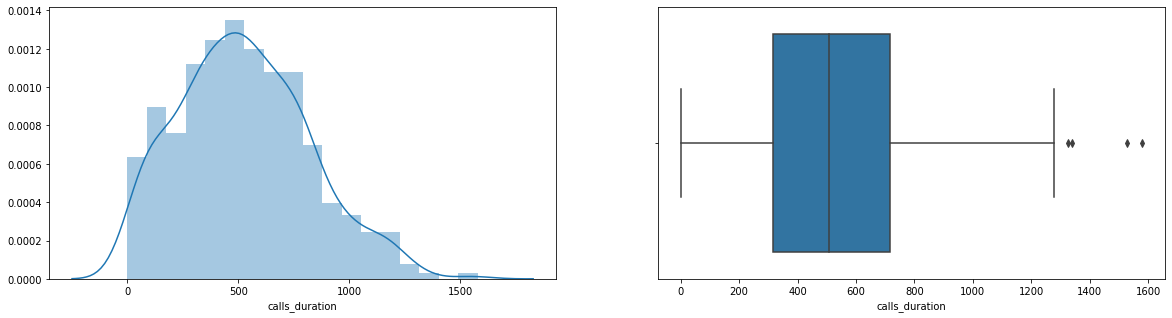

In [76]:
dist_and_box(ultra,col)

In [77]:
#Проверим диапазон, скольк доля не покрытых значений 
ultra[ultra[col]> 1409][col].count()/ultra[col].count()

0.0026595744680851063

In [78]:
ultra_mean + 1 * ultra_sigma

820.6016790164053

In [79]:
ultra_mean - 1 * ultra_sigma

231.71746991976482

Наш диапазон покрывает более 99% выборки, значит расчеты произведены верно. Минимальное значение у нас 0, но левая граница распределения уходит в минус. Причина думаю в том что среднее и медиана смещены влево, на ящике с усами это хорошо видно, и уклон в право. В основном продолжительность от 231 до 820 минут, а под тарифу смарт 220 до 575 мин в месяц.

### Проведем анализ смс для двух тарифов  по месяцам

In [80]:
col = 'messegase_count'
smart_month = smart.groupby('month')[col]
smart_month.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,31.0,20.000000,15.878707,1.0,7.50,16.0,28.50,74.0
2,50.0,27.940000,20.987275,1.0,12.25,22.5,42.75,85.0
3,69.0,35.550725,25.880117,1.0,14.00,29.0,55.00,110.0
4,96.0,35.864583,22.756662,2.0,18.75,32.5,49.25,105.0
5,122.0,39.032787,25.274014,1.0,18.50,37.0,55.00,103.0
6,141.0,38.510638,27.133431,1.0,18.00,33.0,52.00,134.0
7,174.0,38.988506,26.820747,1.0,19.00,35.0,56.00,137.0
8,202.0,39.044554,27.664353,1.0,17.25,34.0,56.00,134.0
9,222.0,39.252252,26.560260,1.0,18.00,34.0,54.75,136.0


In [81]:
ultra_month = ultra.groupby('month')[col]
ultra_month.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,7.0,43.428571,27.663798,4.0,23.00,50.0,64.5,75.0
2,14.0,37.285714,25.694742,2.0,16.50,44.5,54.0,90.0
3,25.0,47.800000,42.739521,1.0,20.00,27.0,68.0,155.0
4,38.0,45.447368,37.567739,3.0,14.75,37.0,71.0,143.0
5,48.0,50.041667,40.702845,1.0,20.25,39.0,79.0,148.0
6,63.0,50.888889,41.018922,3.0,20.00,40.0,73.0,158.0
7,69.0,61.289855,44.175486,1.0,27.00,51.0,91.0,181.0
8,83.0,58.903614,43.802387,2.0,22.50,48.0,87.0,171.0
9,90.0,63.544444,42.151989,1.0,27.50,57.0,89.0,176.0


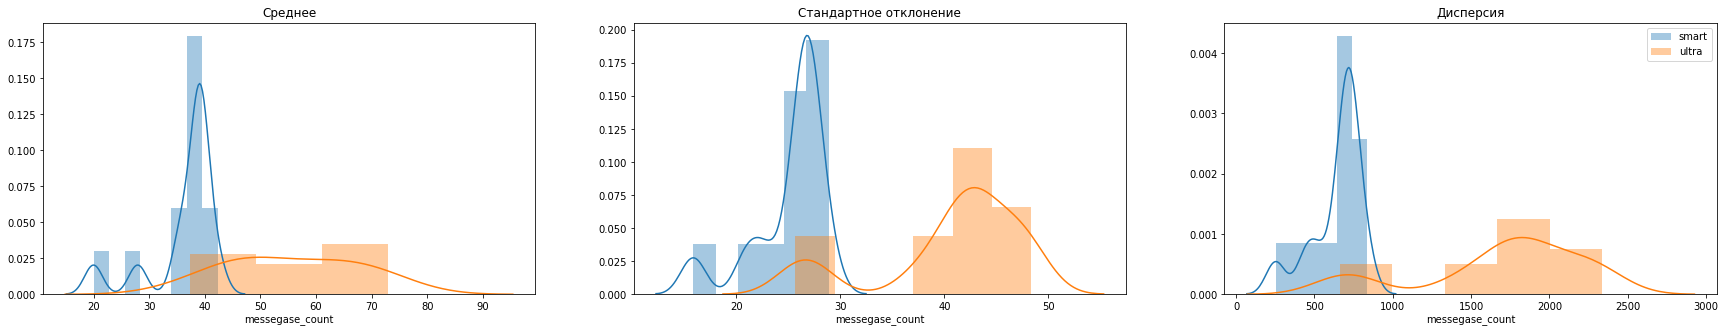

In [82]:
#Построим графики двух тарифов
def compate_two_dist_month():
    fig, axs = plt.subplots(figsize=(30,5),ncols=3)
    sns.distplot(smart_month.mean(),ax=axs[0],label='smart').set_title('Среднее');
    sns.distplot(ultra_month.mean(), ax=axs[0],label='ultra');
    sns.distplot(smart_month.std()**2,ax=axs[2],label='smart').set_title('Дисперсия');
    sns.distplot(ultra_month.std()**2, ax=axs[2],label='ultra');
    sns.distplot(smart_month.std(),ax=axs[1],label='smart').set_title('Стандартное отклонение');
    sns.distplot(ultra_month.std(), ax=axs[1],label='ultra');
    plt.legend()
compate_two_dist_month()

### Теперь посмотрим на каждый по отдельности в общем и сделаем выводы

##### Smart

In [83]:
smart[col].describe()

count    1915.000000
mean       38.767102
std        26.810513
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messegase_count, dtype: float64

Медиана меньше среднего, значит данные скошены вправо.

In [84]:
#Найдем среднее
smart_mean = smart[col].mean()
smart_mean

38.76710182767624

In [85]:
#Найдем "дисперсию"
smart_variance = np.var(smart[col], ddof=1)
smart_variance

718.8036193391555

In [86]:
#Найдем стандартное отклонение
smart_sigma = np.std(smart[col], ddof=1)
smart_sigma

26.810513224090947

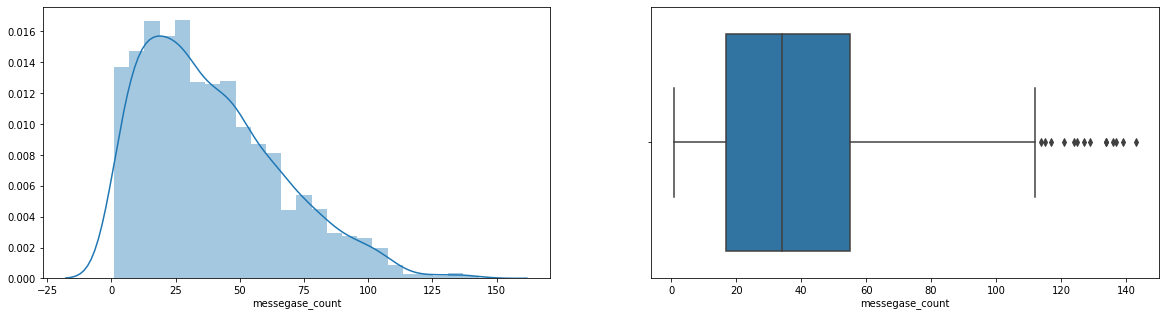

In [87]:
#Построим графики
def dist_and_box(df,col):
    fig, axs = plt.subplots(ncols=2,figsize=(20,5))
    sns.distplot(df[col],ax=axs[0]);
    sns.boxplot(df[col], ax=axs[1]);
dist_and_box(smart,col)

In [88]:
right_area = smart_mean + 3 * smart_sigma
right_area

119.19864149994908

In [89]:
smart_mean - 3 * smart_sigma

-41.66443784459659

In [90]:
#Проверим диапазон, скольк доля не покрытых значений 
smart[smart[col]> right_area][col].count()/smart[col].count()

0.005744125326370757

In [91]:
smart_mean + 1 * smart_sigma

65.5776150517672

In [92]:
smart_mean - 1 * smart_sigma

11.956588603585296

Наш диапазон покрывает более 99% выборки, значит расчеты произведены верно. Минимальное значение у нас 0, но левая граница распределения уходит в минус. На графике отчетлив виден скос вправо в виде плавной горки, из-за этого левая граница распределения уходит в минус. В среднем люди пишут 38 смс. В основном большая часть отправляет от 12 до 65 смс. Видимо кол-во тех кто мало пишет значительно превышает количество тех кто пишет много.

##### Ultra

In [93]:
ultra[col].describe()

count    752.000000
mean      61.640957
std       44.816850
min        1.000000
25%       25.000000
50%       53.000000
75%       89.000000
max      224.000000
Name: messegase_count, dtype: float64

Медиана меньше среднего, значит данные скошены вправо.

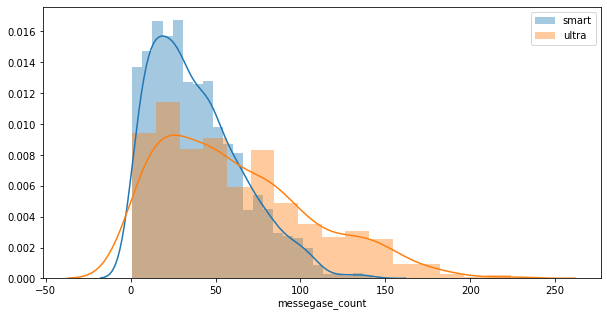

In [94]:
#Построим графики двух тарифов
def compate_two_dist(col):
    fig, axs = plt.subplots(figsize=(10,5))
    sns.distplot(smart[col],ax=axs,label='smart');
    sns.distplot(ultra[col], ax=axs,label='ultra');
    plt.legend()
compate_two_dist(col)

По графикам видно что количество смс отправленных по тарифу ultra больше (оранжевая гистограмма).

In [95]:
#Найдем среднее
ultra_mean = ultra[col].mean()
ultra_mean

61.640957446808514

In [96]:
#Найдем "дисперсию"
ultra_variance = np.var(ultra[col], ddof=1)
ultra_variance

2008.5500113324078

In [97]:
#Найдем стандартное отклонение
ultra_sigma = np.std(ultra[col], ddof=1)
ultra_sigma

44.816849636408044

Среднее количество 61 смс/мес по другому тарифу 38.

In [98]:
ultra_mean + 3 * ultra_sigma

196.09150635603265

In [99]:
ultra_mean - 3 * ultra_sigma

-72.80959146241561

In [100]:
#разделим крайнюю границу распределения по ultra на такую же по smart
196/119

1.6470588235294117

По этому тарифу пишут на 64,7% больше смс. Выбрасов по количеству меньше.

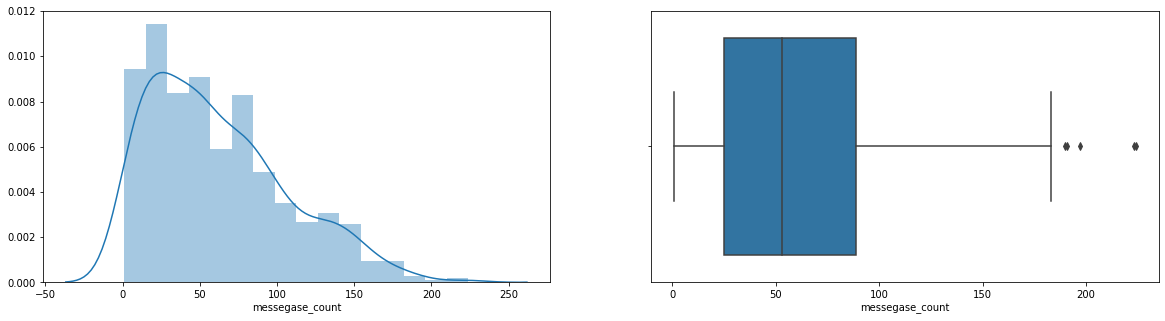

In [101]:
dist_and_box(ultra,col)

In [102]:
#Проверим диапазон, скольк доля не покрытых значений 
ultra[ultra[col]> 196][col].count()/ultra[col].count()

0.003989361702127659

Наш диапазон покрывает более 99% выборки, значит расчеты произведены верно. Минимальное значение у нас 0, но левая граница распределения уходит в минус. Причина в скосе как и у тарифа смарт. Видимо кол-во тех кто мало пишет значительно превышает количество тех кто пишет много.

### Проведем анализ интернет трафика для двух тарифов  по месяцам

In [103]:
col = 'megabyte_used'
smart_month = smart.groupby('month')[col]
smart_month.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,31.0,8686.967742,6418.409639,540.0,4038.00,7137.0,11220.00,24128.0
2,50.0,11940.140000,5957.619200,202.0,8516.25,12621.0,15111.75,28490.0
3,69.0,14640.826087,5823.002528,2001.0,11105.00,14805.0,19202.00,24959.0
4,96.0,13657.822917,5538.079329,690.0,9589.00,14731.0,17508.00,24712.0
5,122.0,16155.024590,5660.836895,1741.0,13130.50,16665.5,19519.50,29725.0
6,141.0,15796.042553,5816.732751,839.0,11825.00,16088.0,19665.00,33887.0
7,174.0,15823.643678,5762.032860,373.0,12241.00,15900.0,19885.25,29461.0
8,202.0,16847.495050,5571.043889,2413.0,13587.75,16833.0,20579.25,31078.0
9,222.0,16373.504505,5239.897368,371.0,12873.50,15998.0,20254.50,31015.0


In [104]:
ultra_month = ultra.groupby('month')[col]
ultra_month.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,7.0,13989.857143,5375.189622,5337.0,11352.00,14792.0,17822.50,19451.0
2,14.0,14893.000000,11326.656605,1316.0,4965.75,15399.0,21262.00,32626.0
3,25.0,17129.920000,10971.179259,3060.0,6677.00,17348.0,26606.00,37329.0
4,38.0,16822.315789,8538.033184,1152.0,10704.25,16782.0,22429.50,33115.0
5,48.0,18935.375000,9631.953649,0.0,12622.50,18914.5,27342.75,42627.0
6,63.0,18483.761905,8878.727253,2539.0,11410.50,17727.0,23718.00,42251.0
7,69.0,20161.652174,9686.448538,2697.0,13433.00,20015.0,27195.00,40802.0
8,83.0,19390.795181,9867.203751,1620.0,12566.00,19240.0,28038.00,37286.0
9,90.0,19391.222222,9063.243931,1445.0,12179.50,19952.0,27520.75,37384.0


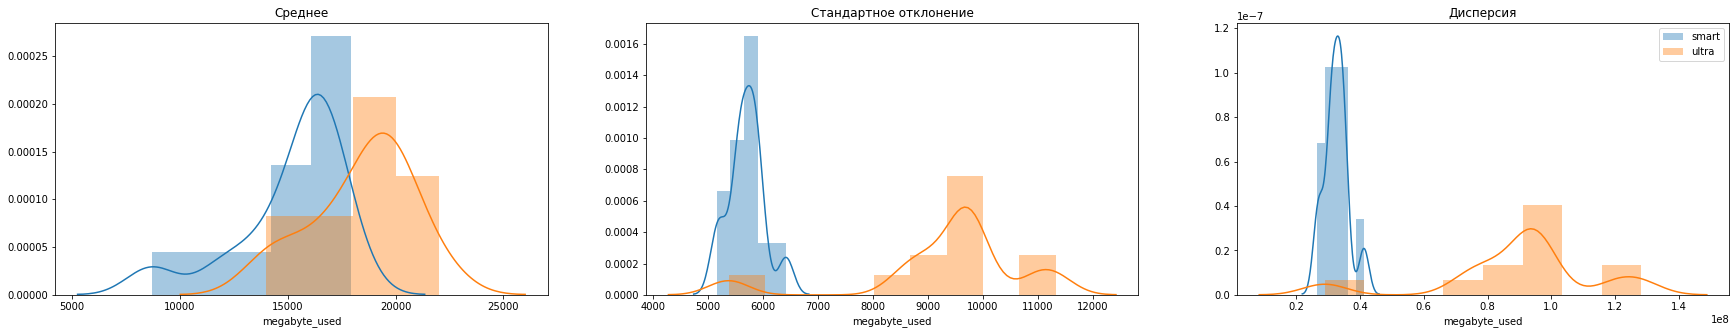

In [105]:
#Построим графики двух тарифов
def compate_two_dist_month():
    fig, axs = plt.subplots(figsize=(30,5),ncols=3)
    sns.distplot(smart_month.mean(),ax=axs[0],label='smart').set_title('Среднее');
    sns.distplot(ultra_month.mean(), ax=axs[0],label='ultra');
    sns.distplot(smart_month.std()**2,ax=axs[2],label='smart').set_title('Дисперсия');
    sns.distplot(ultra_month.std()**2, ax=axs[2],label='ultra');
    sns.distplot(smart_month.std(),ax=axs[1],label='smart').set_title('Стандартное отклонение');
    sns.distplot(ultra_month.std(), ax=axs[1],label='ultra');
    plt.legend()
compate_two_dist_month()

### Теперь посмотрим на каждый по отдельности в общем и сделаем выводы

##### Smart

In [106]:
smart[col].describe()

count     1915.000000
mean     16245.730026
std       5793.012593
min          0.000000
25%      12625.500000
50%      16462.000000
75%      20045.000000
max      38553.000000
Name: megabyte_used, dtype: float64

In [107]:
#Найдем среднее
smart_mean = smart[col].mean()
smart_mean

16245.73002610966

In [108]:
#Найдем "дисперсию"
smart_variance = np.var(smart[col], ddof=1)
smart_variance

33558994.89938532

In [109]:
#Найдем стандартное отклонение
smart_sigma = np.std(smart[col], ddof=1)
smart_sigma

5793.012592717654

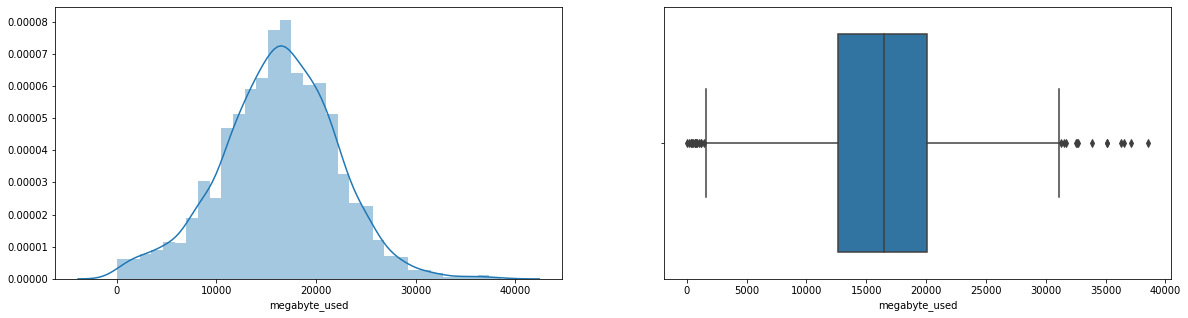

In [110]:
#Построим графики
def dist_and_box(df,col):
    fig, axs = plt.subplots(ncols=2,figsize=(20,5))
    sns.distplot(df[col],ax=axs[0]);
    sns.boxplot(df[col], ax=axs[1]);
dist_and_box(smart,col)

In [111]:
right_area = smart_mean + 3 * smart_sigma
right_area

33624.76780426262

In [112]:
smart_mean - 3 * smart_sigma

-1133.3077520432998

In [113]:
#Проверим диапазон, сколько доля не покрытых значений
smart[smart[col]> right_area][col].count()/smart[col].count()

0.0036553524804177544

In [114]:
smart_mean + 1 * smart_sigma

22038.742618827317

In [115]:
smart_mean - 1 * smart_sigma

10452.717433392007

Наш диапазон покрывает более 99% выборки, значит расчеты произведены верно. На графике колоколообразное нормальное распределение без скошенности. Минимальное значение у нас 0, но левая граница распределения немного уходит в минус. В среднем люди тратят 16245 Мбайт в месяц. В основном большая часть отправляет от 10452 до 22038 Мбайт/мес.

##### Ultra

In [116]:
ultra[col].describe()

count      752.000000
mean     19596.860372
std       9629.563874
min          0.000000
25%      11908.500000
50%      19443.000000
75%      26833.000000
max      49746.000000
Name: megabyte_used, dtype: float64

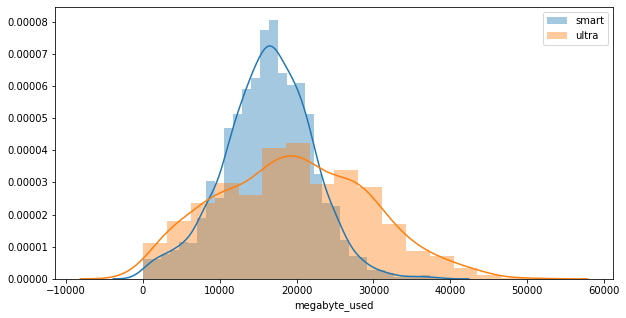

In [117]:
#Построим графики двух тарифов
def compate_two_dist(col):
    fig, axs = plt.subplots(figsize=(10,5))
    sns.distplot(smart[col],ax=axs,label='smart');
    sns.distplot(ultra[col], ax=axs,label='ultra');
    plt.legend()
compate_two_dist(col)

По графикам видно что по тарифу ultra тратят большее количество Мб. Опять же по том что скорей всего такой тариф выбирают люди для работы. Где нужно много общаться и искать информации в интернете, продвигать своё дело в соц сетях и т.д.

In [118]:
#Найдем среднее
ultra_mean = ultra[col].mean()
ultra_mean

19596.860372340427

In [119]:
#Найдем "дисперсию"
ultra_variance = np.var(ultra[col], ddof=1)
ultra_variance

92728500.41057137

In [120]:
#Найдем стандартное отклонение
ultra_sigma = np.std(ultra[col], ddof=1)
ultra_sigma

9629.56387436998

Среднее количество 9629 Мб/мес по другому тарифу 5793.

In [121]:
ultra_mean + 3 * ultra_sigma

48485.55199545037

In [122]:
ultra_mean - 3 * ultra_sigma

-9291.831250769512

In [123]:
#разделим крайнюю границу распределения по ultra на такую же по smart
48485/33624

1.4419759695455627

По этому тарифу используют трафика на 44% больше. Выбрасов по количеству меньше.

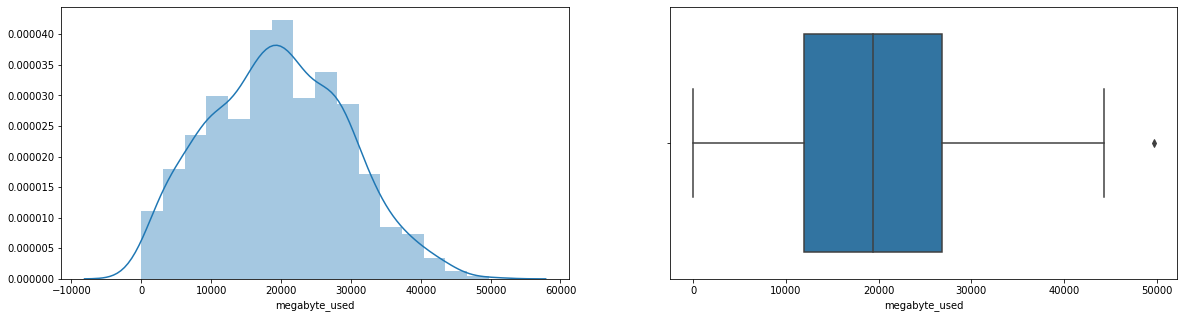

In [124]:
dist_and_box(ultra,col)

In [125]:
#Проверим диапазон, скольк доля не покрытых значений 
ultra[ultra[col]> 48485][col].count()/ultra[col].count()

0.0013297872340425532

Наш диапазон покрывает более 99% выборки, значит расчеты произведены верно.
 Минимальное значение у нас 0, но левая граница распределения немного уходит в минус.
 В среднем пользователи данного тарифа тратят 19507 Мб в месяц.

## Шаг 4. Проверим гипотезы  


### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается  

Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.

Здесь у нас нулевая гипотеза - гипотеза о равенстве средних двух совокупностей.

Сформулируем нулевую гипотезу H₀, что выручка от пользователей тарифа Смарт равна выручке пользователей тарифа Ультра. Так как H₀ всегда формулируется так, чтобы использовать знак равенства.

In [126]:
alpha = .05

In [127]:
results = st.ttest_ind(
    smart['revenu'], 
    ultra['revenu'])
print('p-значение:', results.pvalue)

p-значение: 1.0087590178304795e-133


In [128]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


А альтернативная гипотеза - односторонняя. Так как нам нужно узнать является ли одно среднее значение больше другово в выборке.

Сформулируем альтернативную гипотезу Н1, что средняя выручка от пользователей тарифа Ультра больше средней выручки пользователей тарифа Смарт.

In [129]:
#средняя выручка тарифа smart
interested_value = ultra['revenu'].mean()
results = st.ttest_1samp(smart['revenu'], interested_value)
print('p-значение:', results.pvalue / 2)

p-значение: 1.6075639780106842e-283


In [130]:
if ( (results.pvalue / 2 < alpha) and (smart['revenu'].mean() > interested_value) ):
    print("Отвергаем альтернативную гипотезу")
else:
    print("Не получилось отвергнуть альтернативную гипотезу")

Не получилось отвергнуть альтернативную гипотезу


Данные не противоречат гипотизе, что выручка от пользователей тарифа Ультра больше средней выручки пользователей тарифа Смарт.

### Гипотеза: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [131]:
revenu_moscow = all_data[all_data['city']=='Москва']
revenu_other = all_data[all_data['city']!='Москва']

Сформулируем нулевую гипотезу H₀, что выручка от пользователей Москвы равна выручке пользователей других городов. Так как H₀ всегда формулируется так, чтобы использовать знак равенства.

In [132]:
alpha = .05

In [133]:
results = st.ttest_ind(
    revenu_moscow['revenu'], 
    revenu_other['revenu'])
print('p-значение:', results.pvalue)

p-значение: 0.08244090114571569


In [134]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Данные не противоречат гипотизе, что выручка от пользователей Москвы равна выручке от пользователей других регионов.


## Шаг 5. Напишем общий вывод

In [134]:
#сведем средние в одну таблицу для наглядности
data_result = [['smart', 
         smart['calls_duration'].mean(), 
         smart['messegase_count'].mean(), 
         smart['megabyte_used'].mean(), 
         smart['revenu'].mean()],
       ['ultra', 
         ultra['calls_duration'].mean(), 
         ultra['messegase_count'].mean(), 
         ultra['megabyte_used'].mean(), 
         ultra['revenu'].mean()]]

columns_result = ['tariff','Продолжительность звонков','СМС','Интернет','Траты']

research_result = pd.DataFrame(data = data_result, columns = columns_result)
research_result

,tariff,Продолжительность звонков,СМС,Интернет,Траты
0,smart,397.861097,38.767102,16245.730026,1257.947258
1,ultra,526.159574,61.640957,19596.860372,2048.936170


Все данные приведенные на шаге 3, сведем в таблицу и посмотрим, в среднем по тарифу Ultra и звонков и смс и интернета используется больше в среднем.

Отвечая на изначальный вопрос в задаче, какой тариф приносит больше денег: данные в ходе исследований не противоречат альтернативной гипотезе, "Средняя выручка от пользователей тарифа Ультра больше средней выручки пользователей тарифа Смарт". Так же данные не противоречат гипотезе "Выручка от пользователей Москвы равна выручке пользователей других городов".